<a href="https://colab.research.google.com/github/boazgajja/-Realtime-Ecommerce-Data-Pipeline-Analaytics-Dashboard/blob/main/pca_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

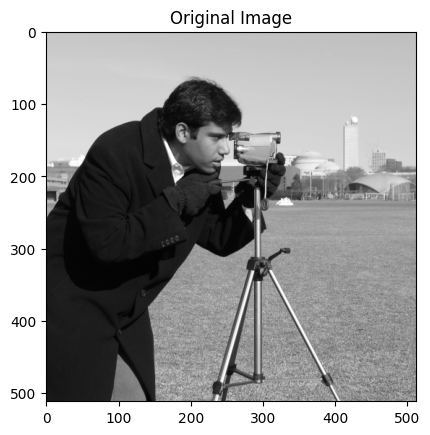

Shape of reshaped image matrix: (512, 512)


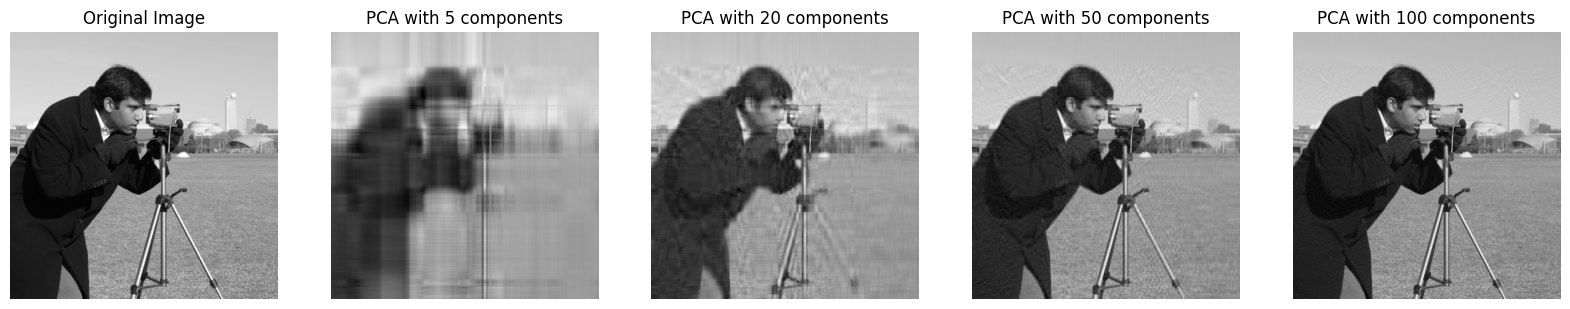

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import data, color
from skimage.transform import resize

# Load the camera image from skimage
image = data.camera()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Flatten the image to a 2D matrix (rows = pixels, columns = features)
X = image.reshape(-1, image.shape[1])
print("Shape of reshaped image matrix:", X.shape)

# Define a function to apply PCA and reconstruct the image
def apply_pca(X, n_components):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    return X_reconstructed

# List of different numbers of components for PCA
n_components_list = [5, 20, 50, 100]

# Reconstruct images using PCA with different numbers of components
reconstructed_images = [apply_pca(X, n) for n in n_components_list]

# Reshape the reconstructed images back to the original image shape
reconstructed_images = [img.reshape(image.shape) for img in reconstructed_images]

# Plotting the original and reconstructed images
fig, axes = plt.subplots(1, len(n_components_list) + 1, figsize=(20, 5))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the reconstructed images with different numbers of PCA components
for i, n in enumerate(n_components_list):
    axes[i + 1].imshow(reconstructed_images[i], cmap='gray')
    axes[i + 1].set_title(f"PCA with {n} components")
    axes[i + 1].axis('off')

plt.show()
